In [6]:
import pickle
import numpy as np
import pandas as pd
%pylab inline

c_range = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
c_range += [5e-3,5e-2,5e-1,5e1,5e2,5e3,5e4]
t_range = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
t_range += [.15,.25,.35,.45,.55,.65,.75,.85,.95]
k_range = np.arange(50, 2200, 25)
def plot_norm_compare(modality):
    X = pickle.load(open('{}.pickle'.format(modality)))

    flag_range = [True, False]
    scores = np.array([x[1] for x in X]).reshape(len(t_range), len(k_range),len(c_range),len(flag_range))
    max_norm = np.argmax(scores,axis=3)
    max_normi = np.zeros(max_norm.shape)
    max_normi[max_norm == 1] = 0
    max_normi[max_norm == 0] = 1
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
    plt.suptitle('{} : Effects of normalization\n normalization performed better in {}% of trials'.format(modality.upper(),np.round(100*(float(len(max_normi[max_normi == 1]))/len(max_normi[~isnan(max_normi)])),4),fontsize=50))

    plt.subplot(221)
    cax = plt.imshow(sum(max_normi,axis=2),interpolation='nearest',aspect=4)
    plt.yticks(np.arange(0,len(t_range),3), t_range[::3])
    plt.ylabel('threshold')
    plt.xticks(np.arange(0,len(k_range),5), k_range[::5],fontsize=10,rotation=45)
    plt.xlabel('K')
    plt.title('summed across C',fontsize=20)
    cbar = plt.colorbar(cax)
    plt.subplot(222)
    cax = plt.imshow(sum(max_normi,axis=1).T,interpolation='nearest')
    plt.xticks(np.arange(0,len(t_range)), t_range, rotation=45)
    plt.xlabel('threshold')
    plt.yticks(np.arange(0,len(c_range)), c_range,fontsize=10)
    plt.ylabel('C')
    plt.title('summed across K',fontsize=20)
    cbar = plt.colorbar(cax)
    plt.subplot(212)
    cax = plt.imshow(sum(max_normi,axis=0).T,interpolation='nearest',aspect=2)
    plt.yticks(np.arange(0,len(c_range)), c_range,fontsize=10)
    plt.ylabel('C')
    plt.xticks(np.arange(0,len(k_range),5), k_range[::5],fontsize=10,rotation=45)
    plt.xlabel('K')
    plt.title('summed across threshold',fontsize=20)
    cbar = plt.colorbar(cax)
    cbar.set_label('n times normalization performed better',fontsize=15)
    return scores, 't k c n'

Populating the interactive namespace from numpy and matplotlib


46440


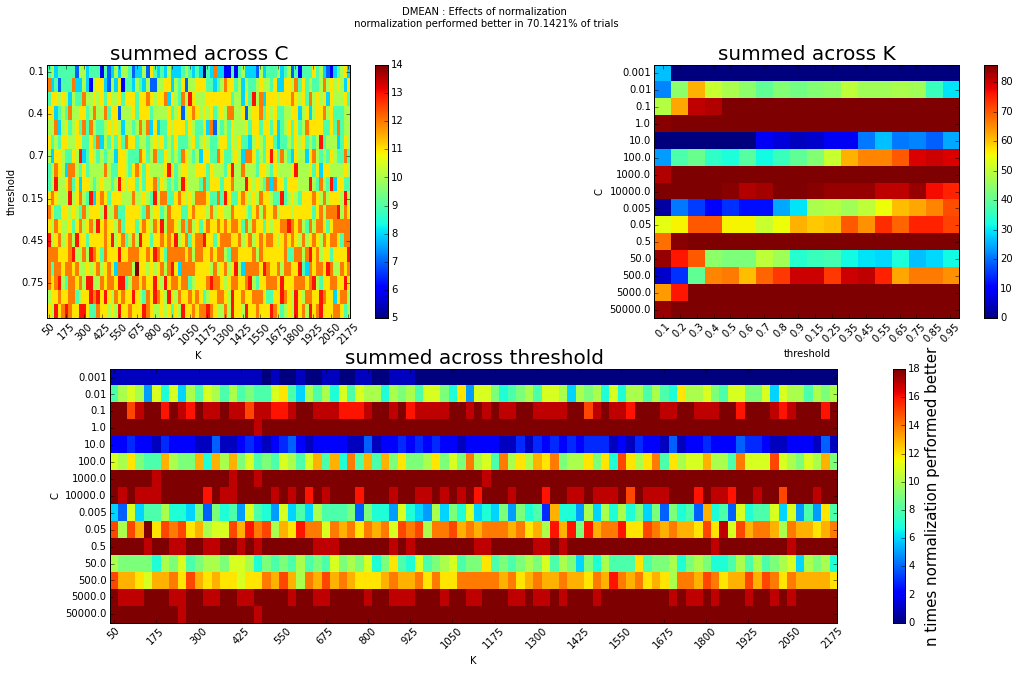

In [31]:
dscores, order = plot_norm_compare('dmean')
print np.prod(dscores.shape)

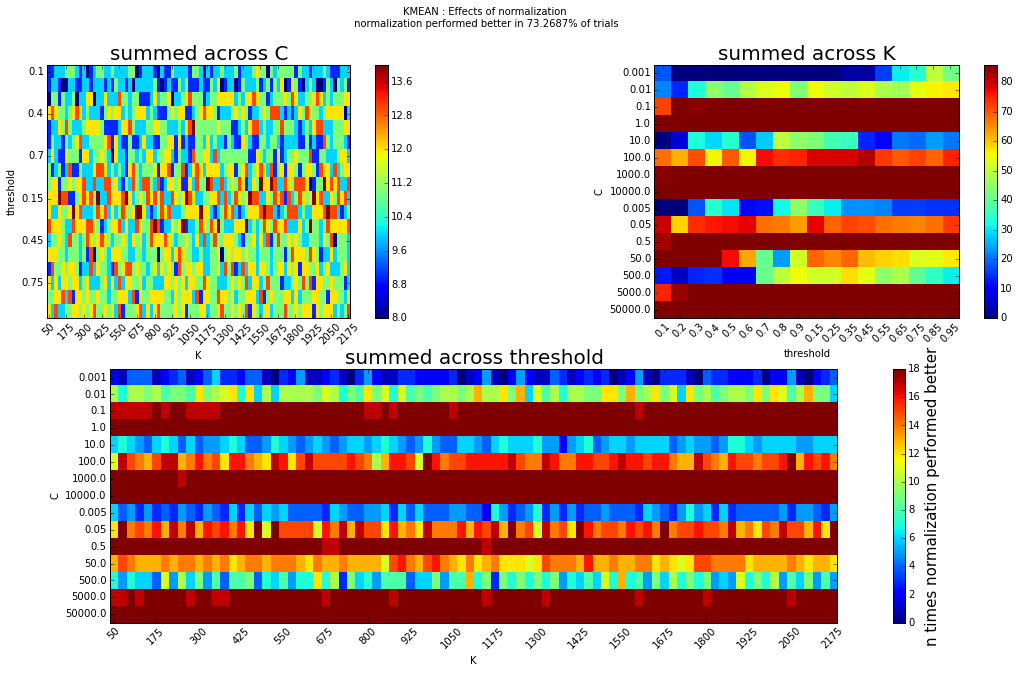

In [26]:
kscores, _ = plot_norm_compare('kmean')

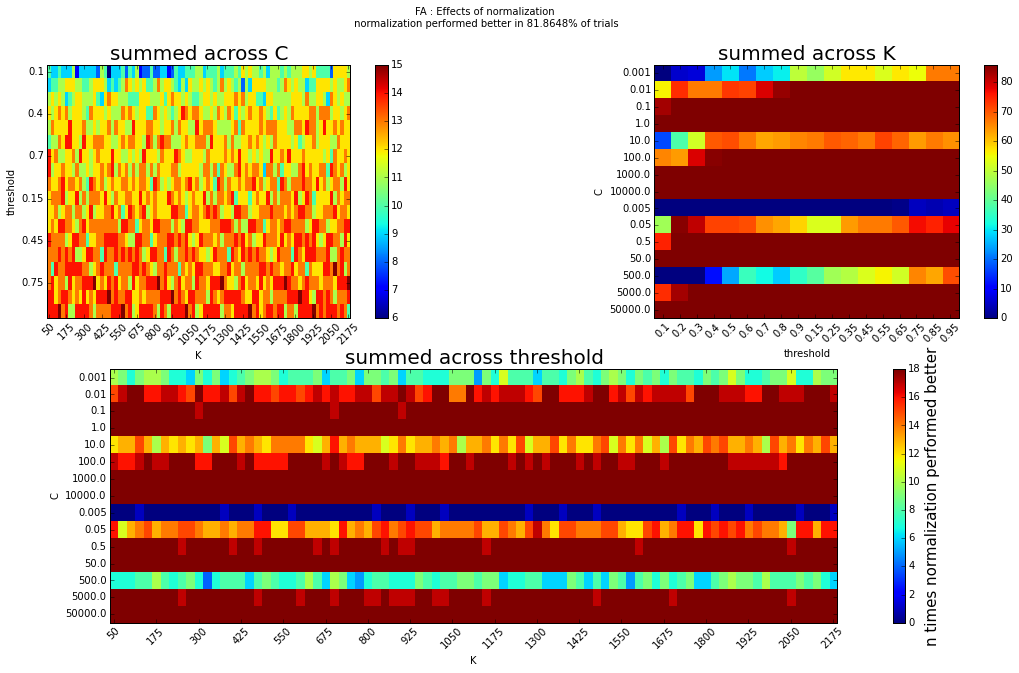

In [27]:
fscores, _ = plot_norm_compare('fa')

(18, 15)


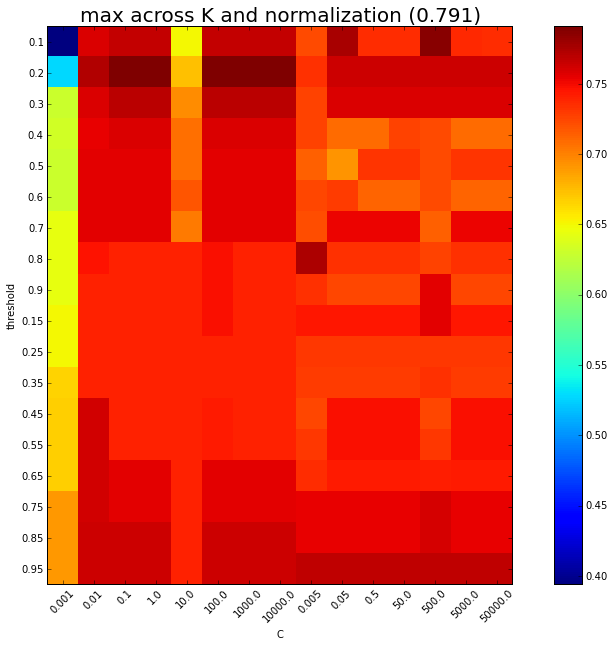

In [28]:
fig = figure(figsize=(15,10))
norm_scores = np.max(dscores,axis=3)
norm_k_scores = np.max(norm_scores,axis=1)
print norm_k_scores.shape
cax = plt.imshow(norm_k_scores,interpolation='nearest',aspect=1)
plt.xticks(np.arange(0,len(c_range)), c_range,rotation=45)
plt.xlabel('C')
plt.yticks(np.arange(0,len(t_range)), t_range,fontsize=10)
plt.ylabel('threshold')
plt.title('DMEAN max across K and normalization ({})'.format(np.round(np.max(norm_k_scores),3)),fontsize=20)
cbar = plt.colorbar(cax)

(18, 15)


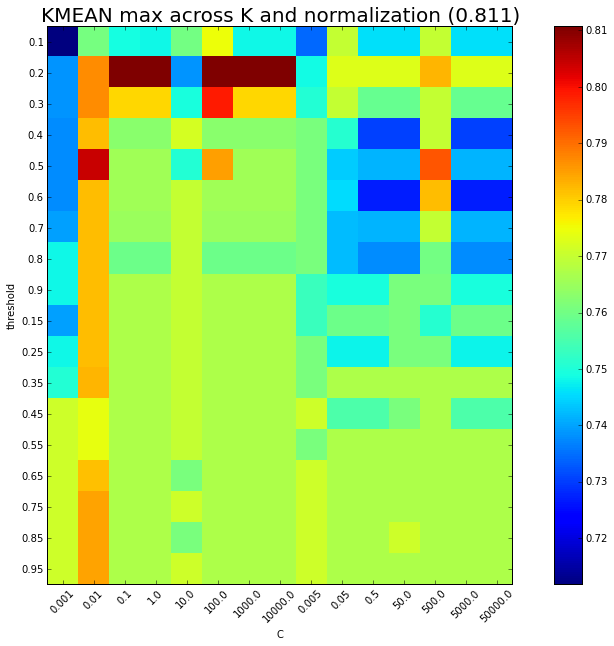

In [29]:
fig = figure(figsize=(15,10))
norm_scores = np.max(kscores,axis=3)
norm_k_scores = np.max(norm_scores,axis=1)
print norm_k_scores.shape
cax = plt.imshow(norm_k_scores,interpolation='nearest',aspect=1)
plt.xticks(np.arange(0,len(c_range)), c_range,rotation=45)
plt.xlabel('C')
plt.yticks(np.arange(0,len(t_range)), t_range,fontsize=10)
plt.ylabel('threshold')
plt.title('KMEAN max across K and normalization ({})'.format(np.round(np.max(norm_k_scores),3)),fontsize=20)
cbar = plt.colorbar(cax)

(18, 15)


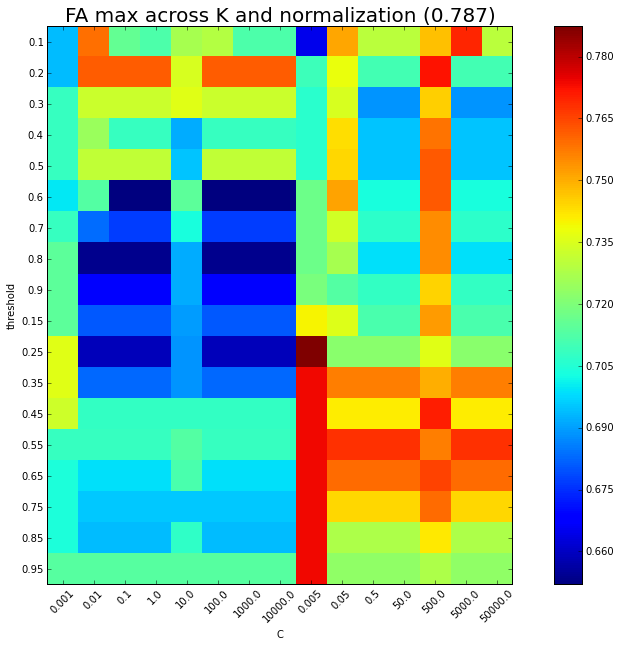

In [30]:
fig = figure(figsize=(15,10))
norm_scores = np.max(fscores,axis=3)
norm_k_scores = np.max(norm_scores,axis=1)
print norm_k_scores.shape
cax = plt.imshow(norm_k_scores,interpolation='nearest',aspect=1)
plt.xticks(np.arange(0,len(c_range)), c_range,rotation=45)
plt.xlabel('C')
plt.yticks(np.arange(0,len(t_range)), t_range,fontsize=10)
plt.ylabel('threshold')
plt.title('FA max across K and normalization ({})'.format(np.round(np.max(norm_k_scores),3)),fontsize=20)
cbar = plt.colorbar(cax)